In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\project\IncomePrediction\IncomePrediction\code\IncomePrediction_final\data\incomeData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
## Attribute Name Description Type
# Age Age of a person Continuous
# Work-class Either government, private or self-employed Categorical
# Education Persons education background example masters degree,
# bachelors degree or high school etc.
# Categorical
# Education-number Number of educational years completed Continuous
# Marital-status Person’s marital status like married, divorced or single etc . Categorical
# Occupation Field of work like sales, technical, managerial or farming etc. Categorical
# Relationship Wife, child, Husband, relative. Categorical
# Race White, Asian, African-American or others Categorical
# Sex Female, Male. Categorical
# Capital-gain Monetary Capital Gain by person Continuous
# Capital-loss Monetary Capital Loss by person Continuous
# Hours-per-week Average Hours Per Week Worked Continuous
# Native-country Person’s native country like USA, India, England, Germany etc. Categorical

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### we can use Min max normalization  technique to scale the values in a fixed range.

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### * Target Variable(Income): Whether a person earns more or less than 50000 INR per year.

In [9]:
# The education column has a corresponding education-num column which has numerical values
df.drop(columns=['education'] ,inplace=True)

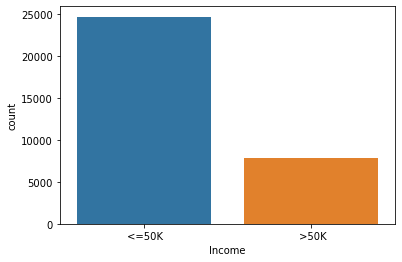

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64


In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(df['Income'])
plt.show()
print(df.Income.value_counts())

In [11]:
for i in df:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-s

### There are some missing values in our dataset which is replaced by the '?',  columns like workclass, occupation & country. 


In [12]:
for i in df.columns:
    count = df[i][df[i]=='?'].count()
    if count!=0:
        print(i+':',df[i][df[i]=='?'].count())
        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  Income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [14]:
# Making sure that the data doesn't cintain unecessary spaces
for i in df:
    temp=[]
    if df[i].dtype == 'O':
        for j in df[i]:
            temp.append(j.strip())
        df[i]=pd.DataFrame(temp.copy())
        del(temp)

In [15]:
df[['workclass']].value_counts()

workclass       
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

In [16]:
for i in df.columns:
    count = df[i][df[i]=='?'].count()
    if count!=0:
        print(i+':',count)

workclass: 1836
occupation: 1843
native-country: 583


In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [18]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [19]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
df.replace('?',np.NaN,inplace=True)

In [20]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [21]:
df['workclass'] = np.array(df['workclass'])

In [22]:
df.head(20)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [23]:
for i in df:
    l=[]
    if df[i].dtype == 'O':
        l=list(df[i].mode())
        df[i]=df[i].fillna(l[0])
        
            

In [24]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [25]:
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [26]:
l[0]

'<=50K'

In [27]:
df['Income']= df['Income'].map({'<=50K':0,'>50K':1})

In [28]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [29]:
categorical = df.select_dtypes(include=['O']).copy()

In [30]:
categorical.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country'],
      dtype='object')

In [31]:
categorical

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [32]:
for i in categorical.columns:
    categorical = pd.get_dummies(categorical,columns=[i], prefix=[i],drop_first=True)


In [33]:
categorical.shape

(32561, 76)

In [34]:
contineous = df.drop(['Income'],axis=1)
contineous

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [35]:
# contineous = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
# contineous

In [36]:
# extracting the numerical columns
contineous = contineous.select_dtypes(include=['int64']).copy()
contineous

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(contineous)

In [39]:
contineous

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [40]:
scaled_data_df = pd.DataFrame(data=scaled_data, columns=contineous.columns)

In [41]:
scaled_data_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [42]:
tv = df['Income']

In [43]:
final_df = pd.concat([categorical,scaled_data_df,tv],axis=1)

In [44]:
final_df

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,1,0,...,1,0,0,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0
32557,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,1
32558,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0
32559,0,0,1,0,0,0,0,0,0,0,...,1,0,0,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0


In [45]:
x= final_df.drop('Income',axis=1)
y = final_df['Income']

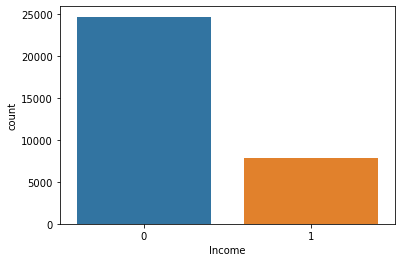

In [46]:
sns.countplot(final_df['Income'])
plt.show()

### data set is imbalance 

In [47]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

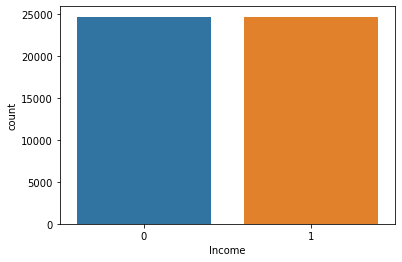

In [48]:
sns.countplot(y_sampled)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_x,test_x,train_y,test_y=train_test_split(x_sampled,y_sampled, random_state=123 )

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [52]:
y_pred = dt.fit(train_x, train_y).predict(test_x)

In [53]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.9155339805825242

In [54]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12,13]
mse_train, mse_test = [],[]

In [55]:
from sklearn.metrics import mean_squared_error
for i in depth:
    prdctr = DecisionTreeClassifier(max_depth= i)       
    prdctr.fit(train_x, train_y)
    y_train_pred=prdctr.predict(train_x)
    y_test_pred=prdctr.predict(test_x)
    
    mse_train.append(mean_squared_error(train_y, y_train_pred))
    mse_test.append(mean_squared_error(test_y, y_test_pred))

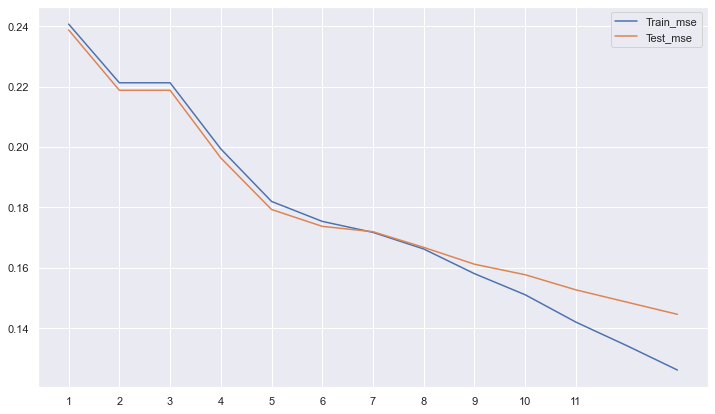

In [56]:

sns.set()
plt.figure(figsize = (12,7))
sns.lineplot(y=mse_train, x = depth, label = 'Train_mse')
sns.lineplot(y=mse_test, x = depth, label = 'Test_mse')
plt.xticks(ticks=np.arange(1,12,1))
plt.show()

In [57]:
regr_test = DecisionTreeClassifier(max_depth=7)
regr_test.fit(train_x, train_y)
y_pred_test=regr_test.predict(test_x)

In [58]:
regr_test.score(train_x,train_y)

0.8282901833872708

In [59]:
regr_test.score(test_x,test_y)

0.8279935275080906

In [60]:
prediction_test = dt.predict(test_x)
prediction_test

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
dt.score(test_x,test_y)

0.9155339805825242

In [62]:
print(classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      6246
           1       0.79      0.89      0.84      6114

    accuracy                           0.83     12360
   macro avg       0.83      0.83      0.83     12360
weighted avg       0.83      0.83      0.83     12360



In [63]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestClassifier(n_estimators=100,random_state=123,n_jobs=1)


In [64]:
params = {'max_depth': [2,4,6,7,8],'max_features':['sqrt',0.25,0.5,0.75,1]}

In [65]:
rgr = RandomizedSearchCV(rfr,params,n_iter=10,cv=10)

In [66]:
model =rgr.fit(x_sampled,y_sampled)

In [68]:
y_pred = model.predict(x_sampled)

In [69]:
model.score(x_sampled,y_sampled)

0.8369336569579288

In [70]:
from pprint import pprint

In [71]:
print(model.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 0.75, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [72]:
rfr2 = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True, n_jobs=-1, max_features= 0.5, max_depth= 8)

In [73]:
mod2 = rfr2.fit(x_sampled,y_sampled)

In [74]:
y_pred_tr = mod2.predict(x_sampled)

In [75]:
mod2.score(x_sampled,y_sampled)

0.836448220064725

In [76]:
mod2.oob_score_

0.8323220064724919

In [83]:
mseT = mean_squared_error(y_sampled, y_pred_tr)
print(mseT)
rmseT = mseT**(1/2)
print(rmseT)


0.1635517799352751
0.4044153557115198


In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr2, x_sampled, y_sampled, scoring='accuracy',cv=5).mean()

0.8331917475728154

In [85]:
x_sampled

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,-0.335892,-1.500614,-0.420060,-0.145920,-0.21666,1.017438
49436,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.837109,-0.515777,-0.808759,-0.145920,-0.21666,-0.035429
49437,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0.910422,0.821213,0.746039,0.274245,-0.21666,-0.845327
49438,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.690484,-0.316143,-0.420060,-0.145920,-0.21666,0.774468
